# Clasificación de imágenes

*Computer Vision*, de Cognitive Services, incluye modelos prediseñados útiles para trabajar con imágenes. Sin embargo, normalmente tendrá que entrenar su propio modelo para adaptarlo a Computer Vision. Por ejemplo, supongamos que Northwind Traders quiere crear un sistema de pago automatizado que identifique los artículos que los clientes quieren comprar basándose en una imagen obtenida mediante una cámara en la zona de pago. Para hacerlo, necesitará un modelo de clasificación entrenado que pueda clasificar las imágenes para, así, identificar el artículo que se quiere comprar.

![Un robot sujetando unas hojas, clasificando imágenes de una manzana, banana y una naranja](../images/image-classification.jpg)

En Azure, puede usar ***Custom Vision***, que forma parte de Cognitive Services, para entrenar un modelo de clasificación de imágenes basado en imágenes existentes. Hay dos elementos esenciales para crear una solución de clasificación de imágenes. Primero, debe entrenar un modelo que reconozca diferentes clases con imágenes existentes. Después, cuando el modelo esté entrenado, debe publicarlo como un servicio que las aplicaciones puedan consumir.

## Crear un recurso de Custom Vision

Para usar el servicio Custom Vision, necesita un recurso de Azure que pueda usar para *entrenar* un modelo, y un recurso con el que *publicarlo* para que las aplicaciones lo usen. El recurso de cada una (o ambas) de las tareas pueden ser un recurso general de **Cognitive Services** o un recurso específico de **Custom Vision**. Puede usar el mismo recurso de Cognitive Services para cada una de esas tareas, o puede usar diferentes recursos (en la misma región) de cada tarea para administrar los costes de forma independiente.

Use las siguientes instrucciones para crear un nuevo recurso de **Custom Vision**.

1. En una nueva pestaña del navegador, abra Azure Portal ([https://portal.azure.com](https://portal.azure.com)) e inicie sesión con la cuenta de Microsoft asociada a su suscripción de Azure.
2. Haga clic en el botón **&#65291;Crear un recurso**, busque *Custom Vision* y cree un recurso de **Custom Vision** con esta configuración:
    - **Opciones de creación**: ambas
    - **Suscripción**: *su suscripción de Azure*
    - **Grupo de recursos**: *seleccione o cree un grupo de recursos con un nombre único*
    - **Nombre**: *escriba un nombre único*
    - **Ubicación de entrenamiento**: *seleccione cualquier región disponible*
    - **Plan de tarifa de entrenamiento**: F0
    - **Ubicación de la predicción**: *la misma región del recurso de entrenamiento*
    - **Plan de tarifa de predicción**: F0

    > **Nota**: Si ya tiene un servicio Custom Vision F0 en su suscripción, seleccione **S0** en este caso.

3. Espere a que se creen los recursos, verá que se aprovisionan dos recursos de Custom Vision, uno para el entrenamiento y otro para la predicción. Para ver estos recursos, vaya al grupo de recursos en el que los creó.

## Crear un proyecto de Custom Vision

Para entrenar un modelo de detección de objetos, debe crear un proyecto de Custom Vision basado en su recurso de entrenamiento. Para hacerlo, debe usar el portal de Custom Vision.

1. Descargue y extraiga las imágenes de entrenamiento de https://aka.ms/fruit-images.
2. En la pestaña de otro explorador, abra el portal de Custom Vision ([https://customvision.ai](https://customvision.ai)). Si se le solicita, inicie sesión con la cuenta de Microsoft asociada a su suscripción de Azure y acepte las Condiciones del servicio
3. En el portal de Custom Vision, cree un nuevo proyecto con la siguiente configuración:
    - **Name**: Grocery Checkout
    - **Description**: Image classification for groceries
    - **Resource**: *The Custom Vision resource you created previously*
    - **Project Types**: Classification
    - **Classification Types**: Multiclass (single tag per image)
    - **Domains**: Food
4. Haga clic en **\[+\] Add images** y seleccione todos los archivos de la carpeta **apple** extraídos anteriormente. Después, cargue los archivos de imágenes e incluya la etiqueta *apple*, como en este ejemplo:

![Cargar la manzana con la etiqueta apple](../images/upload_apples.jpg)
   
5. Repita el paso anterior para cargar las imágenes de la carpeta **banana** con la etiqueta *banana* y las imágenes de la carpeta **orange** con la etiqueta *orange*.
6. Explore las imágenes cargadas en el proyecto de Custom Vision, debería tener 15 imágenes de cada clase, como en este ejemplo:

![Imágenes de frutas etiquetadas: 15 manzanas, 15 bananas y 15 naranjas](../images/fruit.jpg)
    
7. En el proyecto de Custom Vision, sobre las imágenes, haga clic en **Train** para entrenar un modelo de clasificación con las imágenes etiquetadas. Seleccione la opción **Quick Training** y, después, espere a que se complete el entrenamiento (puede tardar alrededor de un minuto).
8. Una vez entrenado el modelo, compruebe las métricas de rendimiento *Precision*, *Recall* y *AP* (miden la precisión de la predicción del modelo de clasificación y sus valores deberían ser altos).

## Prueba del modelo

Debe probar la iteración del modelo antes de publicarla para que las aplicaciones la usen.

1. Sobre las métricas de rendimiento, haga clic en **Quick Test**.
2. En el cuadro **Image URL**, escriba `https://aka.ms/apple-image` y haga clic en &#10132;.
3. Consulte las predicciones obtenidas del modelo, la puntuación de probabilidad de *apple* debería ser la más alta, como en este ejemplo:

![Una imagen con una predicción de clase de una manzana](../images/test-apple.jpg)

4. Cierre la ventana **Quick Test**.

## Publicar y consumir el modelo de clasificación de imágenes

Ya puede publicar su modelo entrenado y usarlo desde una aplicación de cliente.

9. Haga clic en **&#128504; Publish** para publicar el modelo entrenado con la siguiente configuración:
    - **Model name**: groceries
    - **Prediction Resource**: *el recurso de predicción creado anteriormente*

### (!) Comprobar 
¿Ha usado el mismo nombre de modelo: **groceries**?   

10. Después de publicarlo, haga clic en el icono *Settings* (&#9881;) en la esquina superior derecha de la página **Performance** para ver la configuración del proyecto. Después, en **General** (a la izquierda), copie el **Project Id**. Vaya hacia abajo y péguelo en la celda de código debajo del paso 13, en sustitución de **YOUR_PROJECT_ID**.

![ID de proyecto en la configuración del proyecto](../images/cv_project_settings.jpg)

> _**Nota**: Si usó un recurso de **Cognitive Services** en lugar de crear un recurso de **Custom Vision** al principio del ejercicio, puede copiar su clave y punto de conexión desde el lado derecho de la configuración del proyecto, péguelos en la celda de código que aparece más abajo y ejecútela para ver los resultados. Si no es así, siga los pasos que quedan para obtener la clave y el punto de conexión de su recurso de predicción de Custom Vision._

11. En la parte superior izquierda de la página **Project Settings**, haga clic en el icono *Projects Gallery* (&#128065;) para volver a la página principal del portal de Custom Vision, donde debería aparecer su proyecto.

12. En la página principal del portal de Custom Vision, en la esquina superior derecha, haga clic en el icono *Settings* (&#9881;) para ver la configuración de su servicio Custom Vision. Después, en **Resources**, abra su recurso de **predicción** (<u>no</u> el recurso de entrenamiento) y copie sus valores para **Key** y **Endpoint** en la celda de código que aparece debajo del paso 13, en sustitución de **YOUR_KEY** y **YOUR_ENDPOINT**.

### (!) Comprobar 
Si utiliza un recurso de **Custom Vision**, ¿ha usado el recurso de **predicción** (y <u>no</u> el recurso de entrenamiento)?

![Clave y punto de conexión del recurso de predicción en la configuración de Custom Vision](../images/cv_settings.jpg)

13. Para establecer las variables de su ID de proyecto, clave y punto de conexión, haga clic en el botón **Run Cell** (&#9655;) (a la izquierda de la celda siguiente) y ejecute su código.

## Instalamos la biblioteca de Computer Vision

In [2]:
!pip install --upgrade azure-cognitiveservices-vision-customvision

     |████████████████████████████████| 62 kB 645 kB/s eta 0:00:011


## Asignamos nuestras credenciales
* obtenidas del portal de Custom Vision

In [3]:
project_id = ''
key = ''
endpoint = ''

model_name = 'groceries' # esto debe coincidir con el nombre del modelo establecido al publicar la iteración del modelo (distingue mayúsculas de minúsculas).
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model groceries in project 867aed4d-86f8-4b2f-a71e-bc2cec6b9a7a


Ahora, puede usar su clave y punto de conexión con un cliente de Custom Vision para conectarse a su modelo de clasificación de Custom Vision.

Ejecute la siguiente celda de código para clasificar una selección de imágenes de prueba con su modelo publicado.

> **Nota**: No se preocupe demasiado por los detalles del código. Utiliza el SDK de Computer Vision para Python para obtener una predicción de clase de cada imagen en la carpeta /data/image-classification/test-fruit

## Importamos las Bibliotecas

In [4]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

## Autenticamos nuestro cliente

In [5]:
credentials = ApiKeyCredentials(in_headers={"Prediction-key": key})
custom_vision_client = CustomVisionPredictionClient(endpoint=endpoint, credentials=credentials)

## Cargamos las imágenes a nuestro notebook

In [6]:
# Obtener las imágenes de prueba de la carpeta data/vision/test
test_folder = os.path.join('../data', 'image-classification', 'test-fruit')
test_images = os.listdir(test_folder)

## Clasificación de Imágenes

Classifying images in ../data/image-classification/test-fruit ...


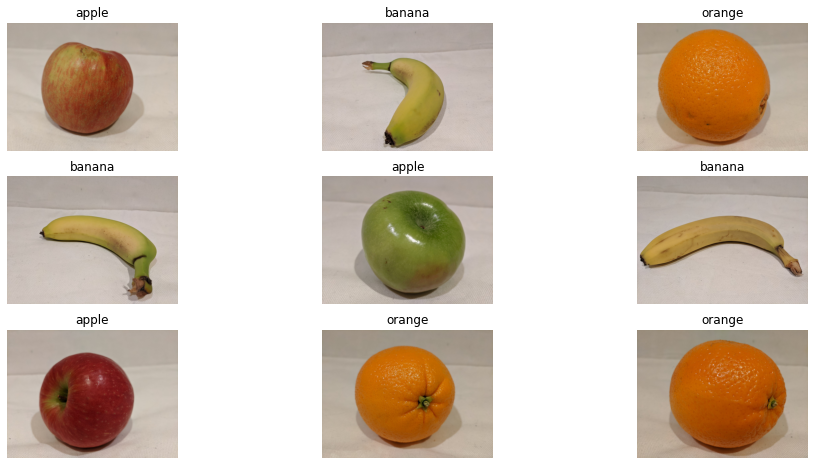

In [7]:
# Crear una figura para mostrar los resultados
fig = plt.figure(figsize=(16, 8))

# Obtener las imágenes y mostrar las clases de predicción de cada una
print('Classifying images in {} ...'.format(test_folder))
for i in range(len(test_images)):
    # Abra la imagen y use el modelo de Custom Vision para clasificarla
    image_contents = open(os.path.join(test_folder, test_images[i]), "rb")
    classification = custom_vision_client.classify_image(project_id, model_name, image_contents.read())
    # Entre los resultados se incluye una predicción para cada etiqueta, en orden descendente de probabilidad: obtenga la primera
    prediction = classification.predictions[0].tag_name
    # Muestre la imagen con su clase prevista
    img = Image.open(os.path.join(test_folder, test_images[i]))
    a=fig.add_subplot(len(test_images)/3, 3,i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(prediction)
plt.show()

Si todo va bien, su modelo de clasificación de imágenes identificará correctamente los artículos de las imágenes.

## Más información

El servicio Custom Vision ofrece más capacidades, además de las descritas en este ejercicio. Por ejemplo, también se puede usar el servicio Custom Vision para crear modelos de *detección de objetos* que no solo clasifican los objetos de las imágenes, también identifican *cuadros de límite* que muestran la ubicación de cada objeto en la imagen.

Para más información sobre el servicio Custom Vision, de Cognitive Services, consulte la [documentación de Custom Vision](https://docs.microsoft.com/azure/cognitive-services/custom-vision-service/home).